In [2]:
# uncomment if not installed
# pip install pyNetLogo

  Using cached pyNetLogo-0.4.2.tar.gz (58 kB)
  Created wheel for pyNetLogo: filename=pyNetLogo-0.4.2-py3-none-any.whl size=64604 sha256=183a8b320155885b9736f418ce354d24090efe78d415f46787d80f057e8fe022
  Stored in directory: c:\users\archipel-03\appdata\local\pip\cache\wheels\fa\5c\68\702aa26a9d2fbd249fe9c4c9d4d333e2baada598c3628e11fb
Successfully built pyNetLogo
Note: you may need to restart the kernel to use updated packages.


In [5]:
# uncomment if not installed
#pip install jpype1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ema_workbench import (Model, RealParameter, TimeSeriesOutcome, 
                           Constant, CategoricalParameter, 
                           IntegerParameter, perform_experiments, 
                           MultiprocessingEvaluator, ema_logging,
                           save_results)

from ema_workbench.connectors.netlogo import NetLogoModel
from ema_workbench.connectors.excel import ExcelModel

from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS

from ema_workbench.analysis import (plotting, plotting_util)

from ema_workbench.util.utilities import load_results

C:\Users\archipel-03\anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:17: ImportWarning: vensim connector not available
  warnings.warn("vensim connector not available", ImportWarning)


#### All input parameters and input possibilities

* EMA/pyNetLogo passes the string value as a raw text into NetLogo, as opposed to as a string. Single '' around the string solve the issue

|Parameter	|Range or value	| Parameter class |
|-----------|--------------|-----------------:|
|Final time	    |1560	    | run_length|
|GDP_change    |'"decreasing"', '"constant"', '"increasing"'	    | CategoricalParameter|
|w_demand_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|regulations_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|trust_agri_change	    |'"decreasing"', '"constant"', '"increasing"'    |CategoricalParameter |
|trust_gov_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|know_dev_change	    |'"decreasing"', '"constant"', '"increasing"'	    |CategoricalParameter |
|GDP_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|rainfall_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|w_demand_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|regulations_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|trust_agri_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|trust_gov_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|know_dev_change_r	    |'"gradual"', '"medium"', '"abrupt"'	    |CategoricalParameter |
|No_consumers	    |4 - 100	    |IntegerParameter |
|No_farmers    |4 - 20	    |IntegerParameter |
|Leader_network_size	    |6 - 12	    |IntegerParameter |
|consumer_leaders    |0 - 0.25	    |RealParameter |
|farmer_leaders	    |0 - 0.25	    |RealParameter |
|leader_influence    |1 - 10	    |IntegerParameter |

#### Outcome parameters
|Outcomes	|Outcome class	
|-----------|--------------:|
|TIME	    |TimeSeriesOutcome	    |
|average_risk_consumers	    |TimeSeriesOutcome	    |
|average_benefit_consumers	    |TimeSeriesOutcome	    |
|average_risk_farmers	    |TimeSeriesOutcome	    |
|average_benefit_farmers	    |TimeSeriesOutcome	    |
|optimistic_consumers	    |TimeSeriesOutcome	    |
|conflicted_consumers	    |TimeSeriesOutcome	    |
|neutral_consumers	    |TimeSeriesOutcome	    |
|alarmed_consumers	    |TimeSeriesOutcome	    |
|optimistic_farmers	    |TimeSeriesOutcome	    |
|conflicted_farmers	    |TimeSeriesOutcome	    |
|neutral_farmers	    |TimeSeriesOutcome	    |
|alarmed_farmers	    |TimeSeriesOutcome	    |

In [2]:
# Create dictionary with the scenarios
scenarios = {"Base scenario" : [Constant('GDP_change', '"constant"'),
                                Constant('rainfall_change', '"constant"'),
                                Constant('w_demand_change', '"constant"'),
                                Constant('regulations_change', '"constant"'),
                                Constant('trust_agri_change', '"constant"'),
                                Constant('trust_gov_change', '"constant"'),
                                Constant('know_dev_change', '"constant"'),
                                Constant("No_consumers", 100),
                                Constant("No_farmers", 20)],
             "Easy does it" :  [Constant('GDP_change', '"constant"'),
                                Constant('rainfall_change', '"constant"'),
                                Constant('w_demand_change', '"increasing"'),
                                Constant('regulations_change', '"constant"'),
                                Constant('trust_agri_change', '"constant"'),
                                Constant('trust_gov_change', '"constant"'),
                                Constant('know_dev_change', '"constant"'),
                                Constant('w_demand_change_r', '"gradual"'),
                                Constant("No_consumers", 100),
                                Constant("No_farmers", 20)],
            "The young ones" : [Constant('GDP_change', '"increasing"'),
                                Constant('rainfall_change', '"constant"'),
                                Constant('w_demand_change', '"increasing"'),
                                Constant('regulations_change', '"constant"'),
                                Constant('trust_agri_change', '"constant"'),
                                Constant('trust_gov_change', '"constant"'),
                                Constant('know_dev_change', '"constant"'),
                                Constant('w_demand_change_r', '"medium"'),
                                Constant('GDP_change_r', '"gradual"'),
                                Constant("No_consumers", 100),
                                Constant("No_farmers", 20)],
             "Of old people" : [Constant('GDP_change', '"decreasing"'),
                                Constant('rainfall_change', '"decreasing"'),
                                Constant('w_demand_change', '"decreasing"'),
                                Constant('regulations_change', '"constant"'),
                                Constant('trust_agri_change', '"constant"'),
                                Constant('trust_gov_change', '"decreasing"'),
                                Constant('know_dev_change', '"constant"'),
                                Constant('w_demand_change_r', '"medium"'),
                                Constant('GDP_change_r', '"abrupt"'),
                                Constant('rainfall_change_r', '"gradual"'),
                                Constant('trust_gov_change_r', '"abrupt"'),
                                Constant("No_consumers", 100),
                                Constant("No_farmers", 20)],
             "Max overdrive" : [Constant('GDP_change', '"constant"'),
                                Constant('rainfall_change', '"decreasing"'),
                                Constant('w_demand_change', '"increasing"'),
                                Constant('regulations_change', '"constant"'),
                                Constant('trust_agri_change', '"constant"'),
                                Constant('trust_gov_change', '"constant"'),
                                Constant('know_dev_change', '"constant"'),
                                Constant('w_demand_change_r', '"abrupt"'),
                                Constant('rainfall_change_r', '"abrupt"'),
                                Constant("No_consumers", 100),
                                Constant("No_farmers", 20)]
            }
                              
             

In [29]:
ema_logging.log_to_stderr(ema_logging.INFO)

#We can define common uncertainties and outcomes for each model:
uncertainties = [IntegerParameter("Leader_network_size", 6, 12),
                 RealParameter("consumer_leaders", 0, 0.25),
                 RealParameter("farmer_leaders", 0, 0.25),
                 IntegerParameter("leader_influence", 1, 10),
                ] 

outcomes = [TimeSeriesOutcome('TIME'),
            TimeSeriesOutcome('average_risk_consumers'),
            TimeSeriesOutcome('average_benefit_consumers'), 
            TimeSeriesOutcome('average_risk_farmers'),
            TimeSeriesOutcome('average_benefit_farmers'),
            TimeSeriesOutcome('optimistic_consumers'),
            TimeSeriesOutcome('conflicted_consumers'),
            TimeSeriesOutcome('neutral_consumers'),
            TimeSeriesOutcome('alarmed_consumers'),
            TimeSeriesOutcome('optimistic_farmers'),
            TimeSeriesOutcome('conflicted_farmers'),
            TimeSeriesOutcome('neutral_farmers'),
            TimeSeriesOutcome('alarmed_farmers')
           ]
   

#Define the NetLogo model
nl_model = NetLogoModel('NetLogo', wd='./Netlogo/', 
                        model_file="Risk_benefit_model_fullSetUp_bugs.nlogo")
nl_model.run_length = 1560
nl_model.replications = 100
nl_model.uncertainties = uncertainties
nl_model.outcomes = outcomes
nr_experiments = 100
# Uncomment if there are constants defined
# nl_model.constants = constants

In [30]:
%%time  
try:
    all_experiments, all_outcomes = load_results("results/scenario_results.tar.gz")
except IOError:
    # Create empty dataframe and dictionary
    all_experiments = pd.DataFrame()
    all_outcomes = {}

    # iterate through the different scenarios
    for scenario in scenarios:
        nl_model.constants = scenarios[scenario]
        with MultiprocessingEvaluator(nl_model) as evaluator:
            experiments, outcomes = evaluator.perform_experiments(nr_experiments, 
                                                                  uncertainty_sampling=LHS)

        # Change scenario names  
        experiments["scenario"] = scenario
        # Concat all experiments together
        dfs = [all_experiments, experiments]
        all_experiments = pd.concat(dfs, ignore_index=True,)

        # Empty dictionaries evaluate to false
        # Concat all outcomes together as well
        if bool(all_outcomes):
            ds = [all_outcomes, outcomes]
            for k in outcomes.keys():
                all_outcomes[k] = np.concatenate(list(all_outcomes[k] for all_outcomes in ds))
        else:
            ds = [outcomes]
            for k in outcomes.keys():
                all_outcomes[k] = np.concatenate(list(all_outcomes[k] for all_outcomes in ds))

    save_results((all_experiments, all_outcomes), "results/scenario_results.tar.gz")

[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 90 cases completed
[MainProcess/INFO] 100 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] pool started
[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
[MainProcess/INFO] 10 cases completed
[MainProcess/INFO] 20 cases completed
[MainProcess/INFO] 30 cases completed
[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 50 cases completed
[MainProcess/INFO] 60 cases completed
[MainProcess/INFO] 70 cases completed
[MainProcess/INFO] 80 cases completed

KeyboardInterrupt: 

In [31]:
print(all_experiments.shape)
for k, v in all_outcomes.items():
    print(k, v.shape)

all_experiments

(500, 7)
TIME (500, 100, 1561)
average_risk_consumers (500, 100, 1561)
average_benefit_consumers (500, 100, 1561)
average_risk_farmers (500, 100, 1561)
average_benefit_farmers (500, 100, 1561)
optimistic_consumers (500, 100, 1561)
conflicted_consumers (500, 100, 1561)
neutral_consumers (500, 100, 1561)
alarmed_consumers (500, 100, 1561)
optimistic_farmers (500, 100, 1561)
conflicted_farmers (500, 100, 1561)
neutral_farmers (500, 100, 1561)
alarmed_farmers (500, 100, 1561)


,Leader_network_size,consumer_leaders,farmer_leaders,leader_influence,scenario,policy,model
0,7.0,0.076187,0.219399,8.0,Base scenario,None,NetLogo
1,6.0,0.213338,0.178827,5.0,Base scenario,None,NetLogo
2,10.0,0.193258,0.081485,5.0,Base scenario,None,NetLogo
3,10.0,0.008493,0.241395,1.0,Base scenario,None,NetLogo
4,12.0,0.062950,0.159907,1.0,Base scenario,None,NetLogo
...,...,...,...,...,...,...,...
495,6.0,0.144071,0.004164,3.0,Max overdrive,None,NetLogo
496,8.0,0.043760,0.207027,2.0,Max overdrive,None,NetLogo
497,10.0,0.107505,0.218391,4.0,Max overdrive,None,NetLogo
498,9.0,0.121921,0.190026,9.0,Max overdrive,None,NetLogo


In [34]:
save_results((all_experiments, all_outcomes), "results/scenario_results.tar.gz")

KeyboardInterrupt: 

In [35]:
# Define function to get the median from nested lists per column
def column_median(lst):
      return [np.median(i) for i in zip(*lst)]

# Not sure if these will be used

# Define function to get the max from nested lists per column
def column_max(lst):
      return [np.max(i) for i in zip(*lst)]

# Define function to get the min from nested lists per column
def column_min(lst):
      return [np.min(i) for i in zip(*lst)]



In [36]:
%%time 
outcomes_test = all_outcomes.copy()
# Get the median of the replications per experiment, and change the shape of the outcomes
for j in outcomes_test:
    big_list = []
    for i in outcomes_test[j]:
        median_array = np.asarray(column_median(i))
        big_list.append(median_array)
        outcomes_test[j] = np.asarray(big_list)

Wall time: 9min 14s


In [37]:
for k, v in outcomes_test.items():
    print(k, v.shape)

TIME (500, 1561)
average_risk_consumers (500, 1561)
average_benefit_consumers (500, 1561)
average_risk_farmers (500, 1561)
average_benefit_farmers (500, 1561)
optimistic_consumers (500, 1561)
conflicted_consumers (500, 1561)
neutral_consumers (500, 1561)
alarmed_consumers (500, 1561)
optimistic_farmers (500, 1561)
conflicted_farmers (500, 1561)
neutral_farmers (500, 1561)
alarmed_farmers (500, 1561)


In [38]:
save_results((all_experiments, outcomes_test), "results/scenario_results_transformed.tar.gz")

[MainProcess/INFO] results saved successfully to C:\Users\archipel-03\Documents\GitHub\Risk-Benefit_Model\results\scenario_results_transformed.tar.gz


In [40]:
load_experiments, load_outcomes = load_results("results/scenario_results_transformed.tar.gz")

[MainProcess/INFO] results loaded succesfully from C:\Users\archipel-03\Documents\GitHub\Risk-Benefit_Model\results\scenario_results_transformed.tar.gz


In [41]:
print(load_experiments.shape)
for k, v in load_outcomes.items():
    print(k, v.shape)

(500, 7)
TIME (500, 1561)
average_risk_consumers (500, 1561)
average_benefit_consumers (500, 1561)
average_risk_farmers (500, 1561)
average_benefit_farmers (500, 1561)
optimistic_consumers (500, 1561)
conflicted_consumers (500, 1561)
neutral_consumers (500, 1561)
alarmed_consumers (500, 1561)
optimistic_farmers (500, 1561)
conflicted_farmers (500, 1561)
neutral_farmers (500, 1561)
alarmed_farmers (500, 1561)


# Plotting the Result

## Consumers

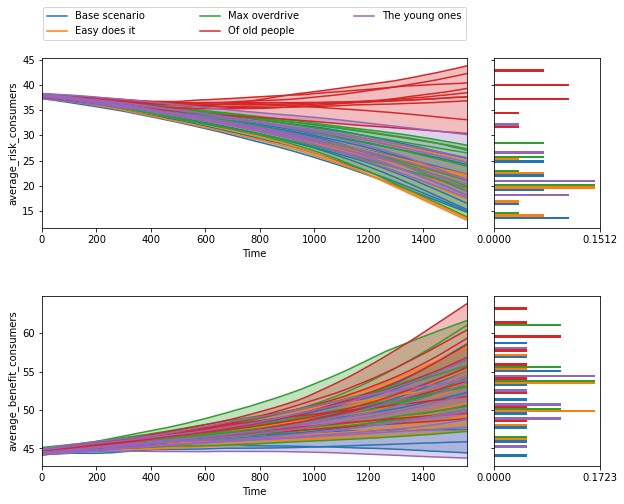

In [22]:
experiments_to_show = np.arange(0, all_experiments.shape[0], 1)

fig, ax = plotting.lines(all_experiments, 
                         outcomes_test, 
                         outcomes_to_show=['average_risk_consumers', 
                                           'average_benefit_consumers'], 
                         group_by='scenario',
                         show_envelope=True, 
                         density=plotting.Density.HIST, 
                         titles=None, 
                         experiments_to_show=experiments_to_show)

fig.set_figheight(7.5)
fig.set_figwidth(10)
plt.show()

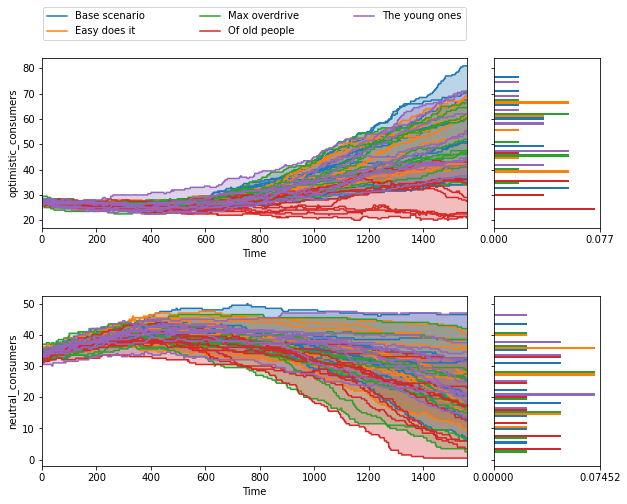

In [23]:
experiments_to_show = np.arange(0, all_experiments.shape[0], 1)

fig, ax = plotting.lines(all_experiments, 
                         outcomes_test, 
                         outcomes_to_show=['optimistic_consumers', 
                                           'neutral_consumers'], 
                         group_by='scenario',
                         show_envelope=True, 
                         density=plotting.Density.HIST, 
                         titles=None, 
                         experiments_to_show=experiments_to_show)

fig.set_figheight(7.5)
fig.set_figwidth(10)
plt.show()

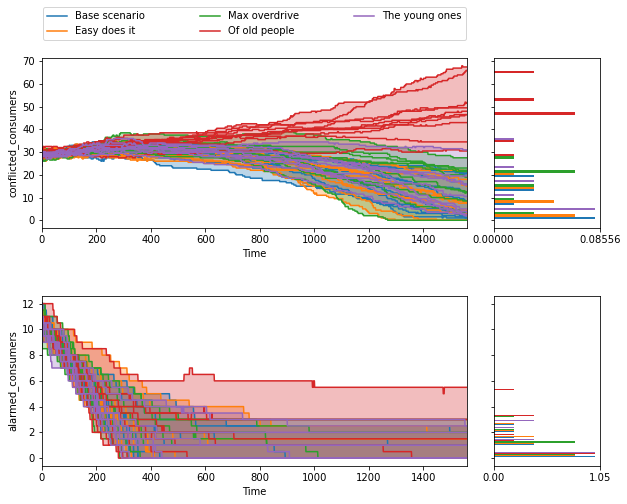

In [24]:
experiments_to_show = np.arange(0, all_experiments.shape[0], 1)

fig, ax = plotting.lines(all_experiments, 
                         outcomes_test, 
                         outcomes_to_show=['conflicted_consumers', 
                                           'alarmed_consumers'], 
                         group_by='scenario',
                         show_envelope=True, 
                         density=plotting.Density.HIST, 
                         titles=None, 
                         experiments_to_show=experiments_to_show)

fig.set_figheight(7.5)
fig.set_figwidth(10)
plt.show()

## Farmers

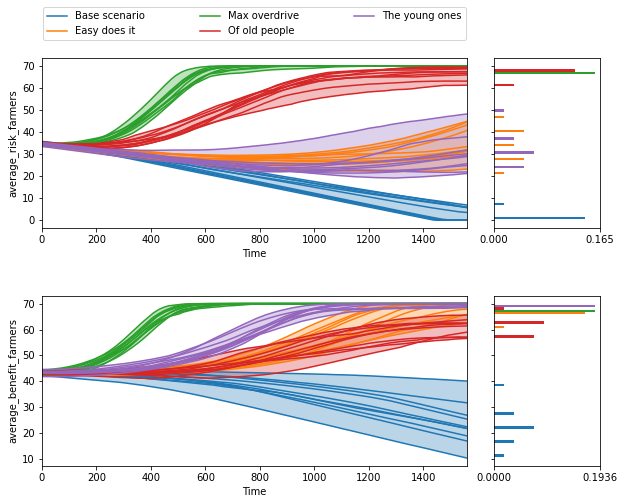

In [25]:
experiments_to_show = np.arange(0, all_experiments.shape[0], 1)

fig, ax = plotting.lines(all_experiments, 
                         outcomes_test, 
                         outcomes_to_show=['average_risk_farmers', 
                                           'average_benefit_farmers'], 
                         group_by='scenario',
                         show_envelope=True, 
                         density=plotting.Density.HIST, 
                         titles=None, 
                         experiments_to_show=experiments_to_show)

fig.set_figheight(7.5)
fig.set_figwidth(10)
plt.show()

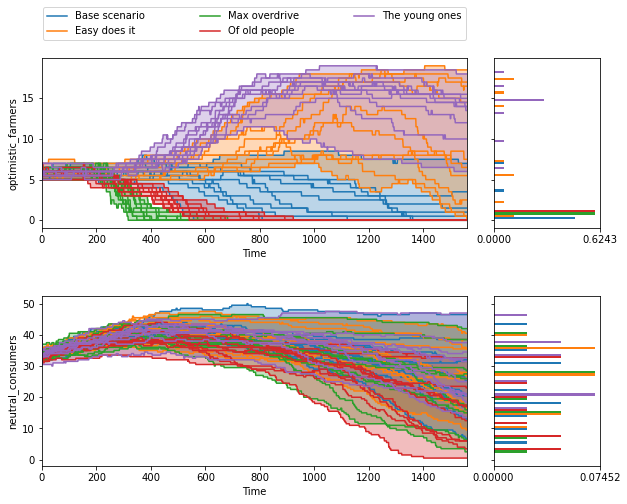

In [26]:
experiments_to_show = np.arange(0, all_experiments.shape[0], 1)

fig, ax = plotting.lines(all_experiments, 
                         outcomes_test, 
                         outcomes_to_show=['optimistic_farmers', 
                                           'neutral_consumers'], 
                         group_by='scenario',
                         show_envelope=True, 
                         density=plotting.Density.HIST, 
                         titles=None, 
                         experiments_to_show=experiments_to_show)

fig.set_figheight(7.5)
fig.set_figwidth(10)
plt.show()

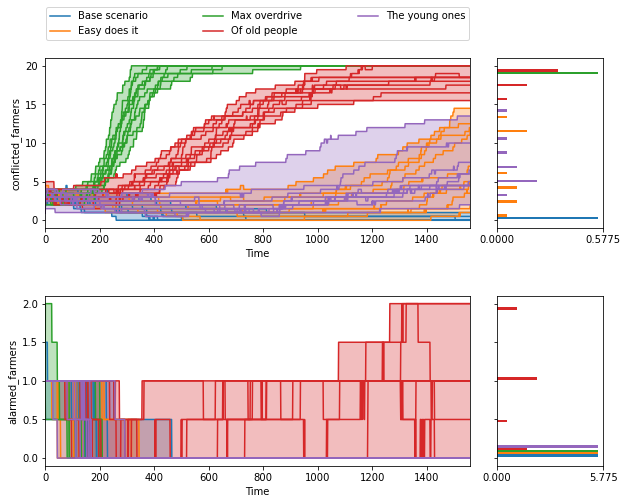

In [27]:
experiments_to_show = np.arange(0, all_experiments.shape[0], 1)

fig, ax = plotting.lines(all_experiments, 
                         outcomes_test, 
                         outcomes_to_show=['conflicted_farmers', 
                                           'alarmed_farmers'], 
                         group_by='scenario',
                         show_envelope=True, 
                         density=plotting.Density.HIST, 
                         titles=None, 
                         experiments_to_show=experiments_to_show)

fig.set_figheight(7.5)
fig.set_figwidth(10)
plt.show()